In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [2]:
fuel = pd.read_csv("./fuel.csv")
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [3]:
X = fuel.copy()
y = X.pop('FE')

In [7]:
y.head()

0    28.0198
1    25.6094
2    26.8000
3    25.0451
4    24.8000
Name: FE, dtype: float64

In [8]:
X.head()

,EngDispl,NumCyl,Transmission,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [12]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object))
    
)

X = preprocessor.fit_transform(X)
y = np.log(y)

In [13]:
print(y)

0       3.332911
1       3.242959
2       3.288402
3       3.220678
4       3.210844
          ...   
1102    3.417484
1103    3.394146
1104    3.417484
1105    3.392597
1106    3.265759
Name: FE, Length: 1107, dtype: float64


In [21]:
input_shape = [X.shape[1]]
print(input_shape)

[50]


In [22]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [24]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128,activation='relu', input_shape= input_shape),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
    
])

In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [26]:
history = model.fit(
    X,y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1846
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1914 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6854 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4011 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2247 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1737 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1382 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1184 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0983 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0846 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0722 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0700 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0649 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0574 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0598 
Epoch 16/200
9/9 ━━━

<Axes: >

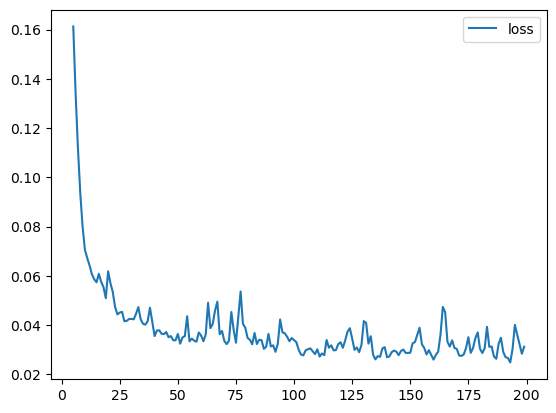

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()

In [34]:
# Predict on training data
y_pred_log = model.predict(X).flatten()
y_true_log = y

# Convert back to original scale
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_true_log)

# Custom accuracy: % predictions within 10% of true value
tolerance = 0.10
accuracy = np.mean(np.abs(y_pred - y_true) / y_true < tolerance)
print(f"Custom Accuracy (within 10%): {accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Custom Accuracy (within 10%): 97.02%
